In [2]:
from b2heavy.TwoPointFunctions.utils     import correlation_diagnostics
from b2heavy.TwoPointFunctions.types2pts import CorrelatorIO, plot_effective_coeffs
from b2heavy.TwoPointFunctions.fitter    import StagFitter

import numpy             as np
import gvar              as gv
import matplotlib.pyplot as plt

In the following section, we set all the parameter for the analysis

In [93]:
# Correlator specifics
ENSEMBLE = 'Fine-1'
MESON    = 'Dst'
MOMENTUM = '211'

DATA_DIR = '/Users/pietro/code/data_analysis/BtoD/Alex/'

BINSIZE  = 16
SMSLIST  = ['1S-1S','d-d','d-1S']

# Correlation matrix specifics
DIAG   = False
BLOCK  = False
SCALE  = True
SHRINK = True
SVD    = 0.024

# Specifics of the analysis
TRANGE_EFF = (16,29) 
TRANGE     = (7,29)
NSTATES    = 3
WPRIORS    = True
JKFIT      = False

In the following cell, we initialize the objects of `b2heavy` that read the data and format them

In [94]:
io   = CorrelatorIO(ENSEMBLE,MESON,MOMENTUM,PathToDataDir=DATA_DIR)
stag = StagFitter(
    io       = io,
    jkBin    = BINSIZE,
    smearing = SMSLIST
)

We also initialize the instruction to build the covariance matrix

In [95]:
cov_specs = dict(
    diag   = DIAG  ,
    block  = BLOCK ,
    scale  = SCALE ,
    shrink = SHRINK,
    cutsvd = SVD   
)

In the following, we calculate and plot effective mass

In [96]:
effm,effa = stag.meff(TRANGE_EFF,verbose=True,**cov_specs)

Least Square Fit:
  chi2/dof [dof] = 0.43 [42]    Q = 1    logGBF = 87.786

Parameters:
          const   0.8952 (47)     [ 0.900 (41) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10*,1e-10)    (itns/time = 2/0.0)
  fitter = scipy_least_squares    method = trf

Least Square Fit:
  chi2/dof [dof] = 0.47 [42]    Q = 1    logGBF = 174.61

Parameters:
('1S-1S', 'Unpol')     1.668 (37)      [    1.64 (17) ]  
 ('d-1S', 'Unpol')    0.1321 (18)      [  0.1310 (68) ]  
  ('d-d', 'Unpol')   0.01051 (13)      [ 0.01037 (40) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10*,1e-10)    (itns/time = 2/0.0)
  fitter = scipy_least_squares    method = trf



/Users/pietro/code/software/B2heavy/b2heavy/TwoPointFunctions/types2pts.py:38: RuntimeWarning: invalid value encountered in sqrt
  m = np.arccosh( (y[(it+1)%len(y)]+y[(it-1)%len(y)])/y[it]/2 )
/Users/pietro/code/software/B2heavy/b2heavy/TwoPointFunctions/types2pts.py:38: RuntimeWarning: invalid value encountered in log
  m = np.arccosh( (y[(it+1)%len(y)]+y[(it-1)%len(y)])/y[it]/2 )
/Users/pietro/code/software/B2heavy/b2heavy/TwoPointFunctions/types2pts.py:38: RuntimeWarning: invalid value encountered in arccosh
  m = np.arccosh( (y[(it+1)%len(y)]+y[(it-1)%len(y)])/y[it]/2 )


/Users/pietro/code/software/B2heavy/b2heavy/TwoPointFunctions/types2pts.py:38: RuntimeWarning: invalid value encountered in sqrt
  m = np.arccosh( (y[(it+1)%len(y)]+y[(it-1)%len(y)])/y[it]/2 )
/Users/pietro/code/software/B2heavy/b2heavy/TwoPointFunctions/types2pts.py:38: RuntimeWarning: invalid value encountered in log
  m = np.arccosh( (y[(it+1)%len(y)]+y[(it-1)%len(y)])/y[it]/2 )
/Users/pietro/code/software/B2heavy/b2heavy/TwoPointFunctions/types2pts.py:38: RuntimeWarning: invalid value encountered in arccosh
  m = np.arccosh( (y[(it+1)%len(y)]+y[(it-1)%len(y)])/y[it]/2 )


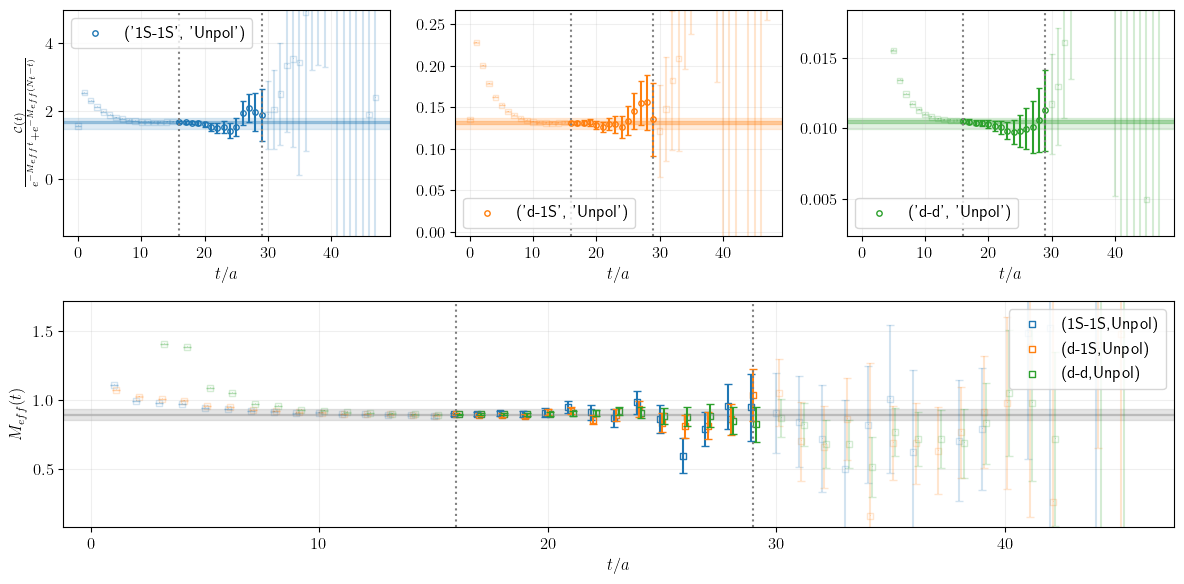

In [97]:
toplot = stag.meff(TRANGE_EFF,**cov_specs,plottable=True)

plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 12

plt.figure(figsize=(12, 6 if len(stag.keys)/len(SMSLIST)==1 else 8))
plot_effective_coeffs(TRANGE_EFF,Aknob=20,*toplot)

plt.tight_layout()
plt.show()

Here we set priors

In [98]:
priors = stag.priors(NSTATES,Meff=effm,Aeff=effa)

# priors['E'][0] = gv.gvar('0.912(70)')

priors

{'E': [0.895(37), -2.08(58), -1.35(76), -2.6(2.5), -2.6(2.5), -2.6(2.5)],
 'Z_1S_Unpol': [0.3(1.1), -1.2(1.2), 0.5(1.5), 0.5(1.5), 0.5(3.0), 0.5(3.0)],
 'Z_d-1S_Unpol': [0.5(1.7), 0.5(1.7), 0.5(1.7), 0.5(1.7)],
 'Z_d_Unpol': [-2.28(60), -3.0(1.5), 0.5(1.5), 0.5(1.5), 0.5(3.0), 0.5(3.0)]}

Now we perform the fit

In [99]:
fit = stag.fit(
    Nstates = NSTATES,
    trange  = TRANGE,
    priors  = priors,
    verbose = True,
    **cov_specs
)

---------- 3+3 fit in (7, 29) for mes: Dst of ens: Fine-1 for mom: 211 --------------
Least Square Fit:
  chi2/dof [dof] = 0.47 [69]    Q = 1    logGBF = 1360.1

Parameters:
            E 0   0.8878 (60)     [ 0.895 (37) ]  
              1    -3.07 (30)     [ -2.08 (58) ]  *
              2    -1.67 (28)     [ -1.35 (76) ]  
              3    -2.91 (43)     [ -2.6 (2.5) ]  
              4    -0.83 (44)     [ -2.6 (2.5) ]  
              5    -0.97 (30)     [ -2.6 (2.5) ]  
   Z_1S_Unpol 0    0.116 (60)     [  0.3 (1.1) ]  
              1    -0.25 (12)     [ -1.2 (1.2) ]  
              2     0.98 (12)     [  0.5 (1.5) ]  
              3   0.05 (1.47)     [  0.5 (1.5) ]  
              4     0.2 (2.9)     [  0.5 (3.0) ]  
              5     1.98 (71)     [  0.5 (3.0) ]  
 Z_d-1S_Unpol 0    0.269 (47)     [  0.5 (1.7) ]  
              1    0.207 (30)     [  0.5 (1.7) ]  
              2     0.53 (24)     [  0.5 (1.7) ]  
              3     0.50 (15)     [  0.5 (1.7) ]  
    Z_d_U

In [100]:
fitres = stag.fit_result(
    NSTATES,
    TRANGE,
    verbose = True,
    priors  = priors if WPRIORS else None
)

# ---------- 3+3 fit in (7, 29) for mes: Dst of ens: Fine-1 for mom: 211 --------------
Least Square Fit:
  chi2/dof [dof] = 0.47 [69]    Q = 1    logGBF = 1360.1

Parameters:
            E 0   0.8878 (60)     [ 0.895 (37) ]  
              1    -3.07 (30)     [ -2.08 (58) ]  *
              2    -1.67 (28)     [ -1.35 (76) ]  
              3    -2.91 (43)     [ -2.6 (2.5) ]  
              4    -0.83 (44)     [ -2.6 (2.5) ]  
              5    -0.97 (30)     [ -2.6 (2.5) ]  
   Z_1S_Unpol 0    0.116 (60)     [  0.3 (1.1) ]  
              1    -0.25 (12)     [ -1.2 (1.2) ]  
              2     0.98 (12)     [  0.5 (1.5) ]  
              3   0.05 (1.47)     [  0.5 (1.5) ]  
              4     0.2 (2.9)     [  0.5 (3.0) ]  
              5     1.98 (71)     [  0.5 (3.0) ]  
 Z_d-1S_Unpol 0    0.269 (47)     [  0.5 (1.7) ]  
              1    0.207 (30)     [  0.5 (1.7) ]  
              2     0.53 (24)     [  0.5 (1.7) ]  
              3     0.50 (15)     [  0.5 (1.7) ]  
    Z_d

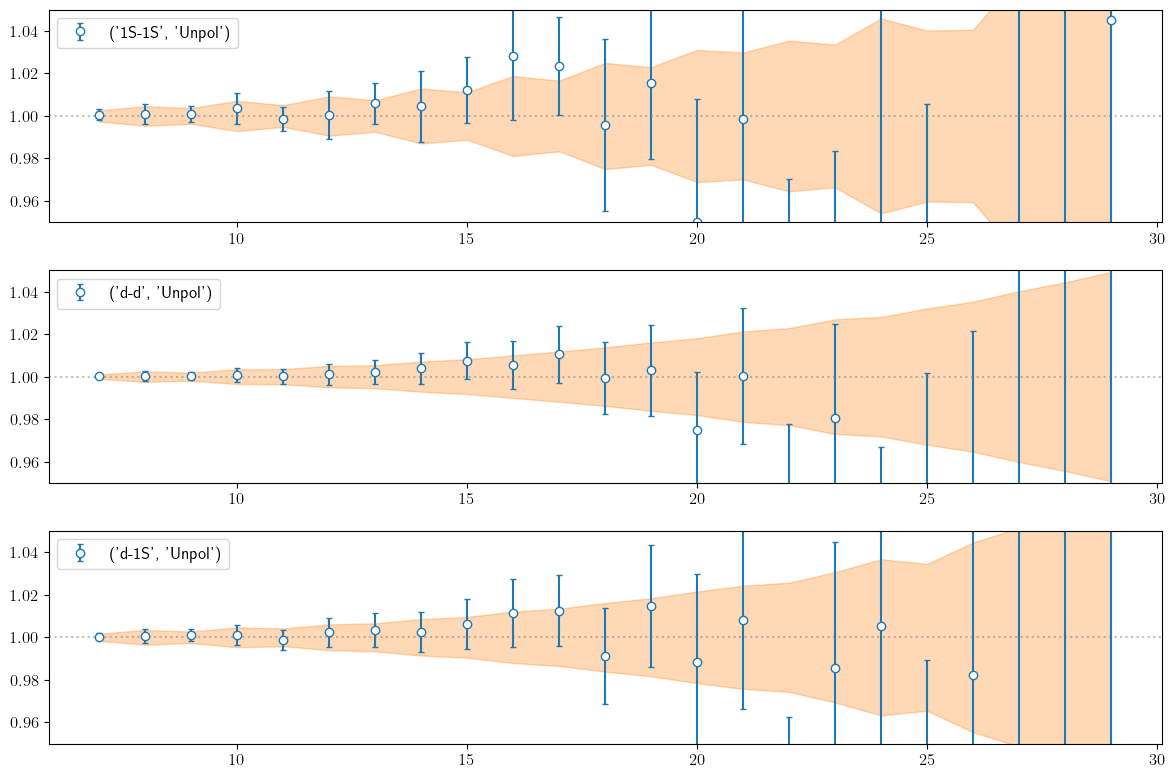

In [101]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 12

npol = len(stag.keys)//len(SMSLIST)
f, ax = plt.subplots(3,npol,figsize=(12,8))
stag.plot_fit(ax,NSTATES,TRANGE)

plt.tight_layout()

In [102]:
from b2heavy.TwoPointFunctions.utils import p_value

chi2  = float(fitres['chi2'])
nconf = stag.data.shape[-2]
ndof  = len(fit.y) - sum([len(priors[k]) for k in priors]) 

p_value(chi2,1017,ndof)

0.9608811156493061